In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
data_folder = r'C:\Users\esteb\OneDrive - Universidad de los andes\Documentos\ANDES\Noveno Semestre\PA-RSPPs\PA-Experiments\output'

time_sarp = pd.read_csv(os.path.join(data_folder, 'time_sarp.csv'))
prune_sarp = pd.read_csv(os.path.join(data_folder, 'prune_sarp.csv'))
length_prune_sarp = pd.read_csv(os.path.join(data_folder, 'length_prune_sarp.csv'))
time_sdrspp = pd.read_csv(os.path.join(data_folder, 'time_sdrspp.csv'))
nondominated_sdrspp = pd.read_csv(os.path.join(data_folder, 'nondominated_sdrspp.csv'))

In [5]:
pastel_green = "#79b385"  # Darker shade of pastel green
pastel_blue = "#6a9db5"   # Darker shade of pastel blue

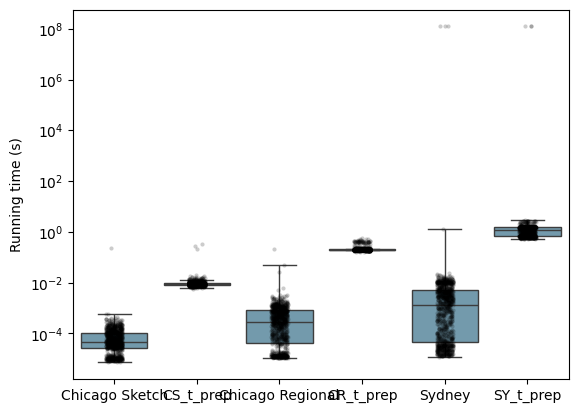

Chicago Sketch      3.15E-04
CS_t_prep           9.94E-03
Chicago Regional    8.01E-04
CR_t_prep           2.15E-01
Sydney              3.70E+05
SY_t_prep           3.70E+05
dtype: object
Chicago Sketch      4.62E-05
CS_t_prep           8.83E-03
Chicago Regional    2.90E-04
CR_t_prep           2.01E-01
Sydney              1.33E-03
SY_t_prep           1.17E+00
dtype: object
Chicago Sketch      7.59E-03
CS_t_prep           1.51E-02
Chicago Regional    6.99E-03
CR_t_prep           5.23E-02
Sydney              6.76E+06
SY_t_prep           6.76E+06
dtype: object


In [6]:
time_sarp = time_sarp.rename(columns={"CS_t": "Chicago Sketch", "CR_t": "Chicago Regional", "SY_b": "Sydney"})
boxplot = sns.boxplot(data=time_sarp, log_scale=True, showfliers=False, color=pastel_blue)
sns.stripplot(data=time_sarp, color='black', alpha=0.2, size=3, jitter=True, log_scale=True)
boxplot.set_ylabel("Running time (s)", fontsize=10)
plt.show()

#print each mean value in scientific notation
print(time_sarp.mean().apply(lambda x: '%.2E' % x))
print(time_sarp.median().apply(lambda x: '%.2E' % x))
print(time_sarp.std().apply(lambda x: '%.2E' % x))

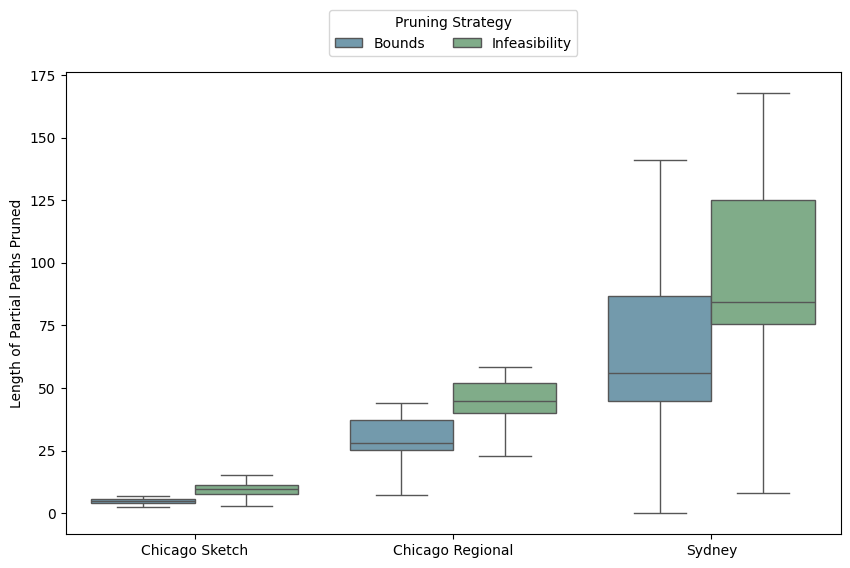

Mean Length of Pulse Pruned for Each Prune by Network:
            Network          Prune     Number
0  Chicago Regional         Bounds  32.387726
1  Chicago Regional  Infeasibility  48.314460
2    Chicago Sketch         Bounds   4.873760
3    Chicago Sketch  Infeasibility   9.699077
4            Sydney         Bounds  65.720600
5            Sydney  Infeasibility  98.550450


In [5]:
melted_data = pd.melt(length_prune_sarp, var_name="Network", value_name="Number")

melted_data["Prune"] = melted_data["Network"].apply(lambda x: "Bounds" if "b" in x else "Infeasibility")
melted_data["Network"] = melted_data["Network"].replace({
    "CS_b": "Chicago Sketch",
    "CS_i": "Chicago Sketch",
    "CR_b": "Chicago Regional",
    "CR_i": "Chicago Regional",
    "SY_b": "Sydney",
    "SY_i": "Sydney"
})

fig, ax = plt.subplots(figsize=(10, 6))


boxplot = sns.boxplot(
    data=melted_data,
    x="Network",
    y="Number",
    hue="Prune",
    palette=[pastel_blue, pastel_green],
    showfliers=False,
    ax=ax,
    log_scale=False
)

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles)) 
ax.legend(unique_labels.values(), unique_labels.keys(), title="Pruning Strategy", loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.15))
ax.set_xlabel('')
boxplot.set_ylabel("Length of Partial Paths Pruned", fontsize=10)
plt.show()

mean_values = melted_data.groupby(["Network", "Prune"])["Number"].mean().reset_index()
print("Mean Length of Pulse Pruned for Each Prune by Network:")
print(mean_values)

In [6]:
print("Mean Number Pruned for Each Prune:")
print(f"Chicago Sketch. Bounds: {prune_sarp['CS_b'].mean()}, Infeasibility: {prune_sarp['CS_i'].mean()}")
print(f"Chicago Regional. Bounds: {prune_sarp['CR_b'].mean()}, Infeasibility: {prune_sarp['CR_i'].mean()}")
print(f"Sydney. Bounds: {prune_sarp['SY_b'].mean()}, Infeasibility: {prune_sarp['SY_i'].mean()}")

Mean Number Pruned for Each Prune:
Chicago Sketch. Bounds: 304.11, Infeasibility: 1013.311
Chicago Regional. Bounds: 748766.454, Infeasibility: 489520.858
Sydney. Bounds: 92568.857, Infeasibility: 110227.49


In [7]:
CS_bounds_percent = (prune_sarp["CS_b"] / (prune_sarp["CS_b"] + prune_sarp["CS_i"])).mean() * 100
CS_inf_percent = (prune_sarp["CS_i"] / (prune_sarp["CS_b"] + prune_sarp["CS_i"])).mean() * 100

CR_bounds_percent = (prune_sarp["CR_b"] / (prune_sarp["CR_b"] + prune_sarp["CR_i"])).mean() * 100
CR_inf_percent = (prune_sarp["CR_i"] / (prune_sarp["CR_b"] + prune_sarp["CR_i"])).mean() * 100

SY_bounds_percent = (prune_sarp["SY_b"] / (prune_sarp["SY_b"] + prune_sarp["SY_i"])).mean() * 100
SY_inf_percent = (prune_sarp["SY_i"] / (prune_sarp["SY_b"] + prune_sarp["SY_i"])).mean() * 100

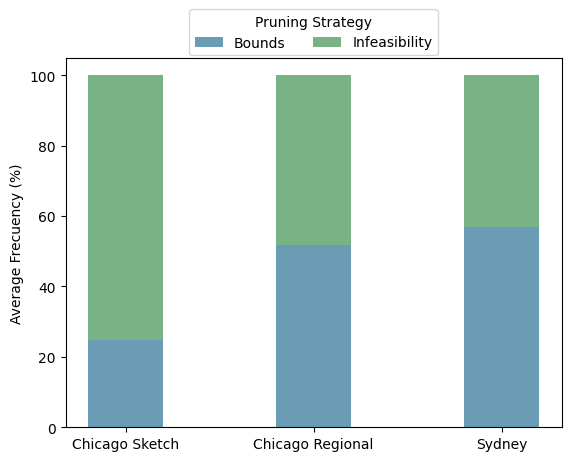

Chicago Sketch
Bounds:  24.84163383964007
Infeasibility:  75.15836616035993
Chicago Regional
Bounds:  51.64205487466561
Infeasibility:  48.35794512533438
Sydney
Bounds:  56.884565473462615
Infeasibility:  43.115434526537385


In [8]:
fig, ax = plt.subplots()

sns.barplot()

bar_width = 0.4

ax.bar("Chicago Sketch", CS_bounds_percent, label="Bounds", color=pastel_blue, width=bar_width)
ax.bar("Chicago Sketch", CS_inf_percent, bottom=CS_bounds_percent, label="Infeasibility", color=pastel_green, width=bar_width)

ax.bar("Chicago Regional", CR_bounds_percent, color=pastel_blue, width=bar_width)
ax.bar("Chicago Regional", CR_inf_percent, bottom=CR_bounds_percent, color=pastel_green, width=bar_width)

ax.bar("Sydney", SY_bounds_percent, color=pastel_blue, width=bar_width)
ax.bar("Sydney", SY_inf_percent, bottom=SY_bounds_percent, color=pastel_green, width=bar_width)

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Use a dictionary to keep unique labels
ax.legend(unique_labels.values(), unique_labels.keys(), title="Pruning Strategy", loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.15))

plt.ylabel("Average Frecuency (%)")
plt.show()

#Print the values for each bar graph
print("Chicago Sketch")
print("Bounds: ", CS_bounds_percent)
print("Infeasibility: ", CS_inf_percent)
print("Chicago Regional")
print("Bounds: ", CR_bounds_percent)
print("Infeasibility: ", CR_inf_percent)
print("Sydney")
print("Bounds: ", SY_bounds_percent)
print("Infeasibility: ", SY_inf_percent)


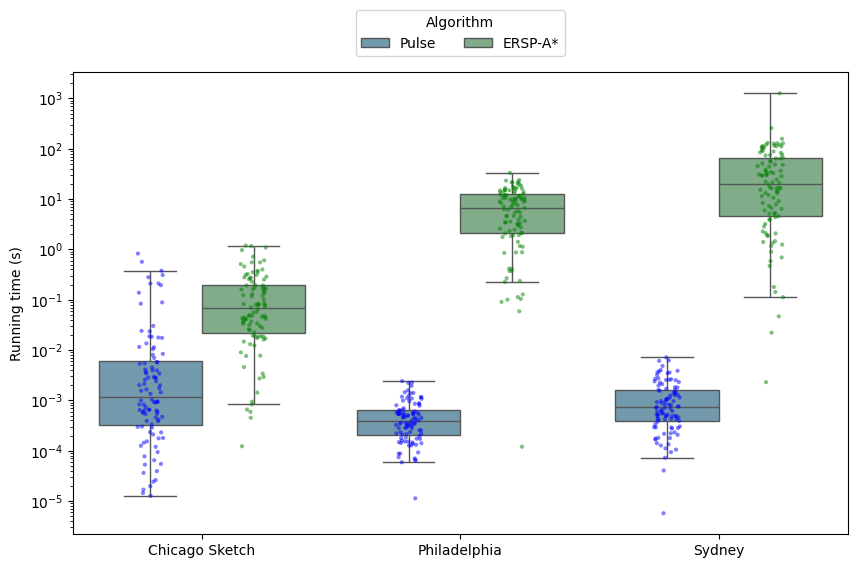

Mean Running Time for Each Algorithm by Network:
          Network Algorithm      Time
0  Chicago Sketch   ERSP-A*  1.67e-01
1  Chicago Sketch     Pulse  3.61e-02
2    Philadelphia   ERSP-A*  8.08e+00
3    Philadelphia     Pulse  5.42e-04
4          Sydney   ERSP-A*  5.22e+01
5          Sydney     Pulse  1.27e-03


In [9]:
melted_data = pd.melt(time_sdrspp, var_name="Network", value_name="Time")

melted_data["Algorithm"] = melted_data["Network"].apply(lambda x: "ERSP-A*" if "ERSPA" in x else "Pulse")
melted_data["Network"] = melted_data["Network"].replace({
    "CS_t": "Chicago Sketch",
    "CS_t_ERSPA": "Chicago Sketch",
    "PH_t": "Philadelphia",
    "PH_t_ERSPA": "Philadelphia",
    "SY_t": "Sydney",
    "SY_t_ERSPA": "Sydney"
})

fig, ax = plt.subplots(figsize=(10, 6))


boxplot = sns.boxplot(
    data=melted_data,
    x="Network",
    y="Time",
    hue="Algorithm",
    palette=[pastel_blue, pastel_green],
    showfliers=False,
    ax=ax,
    log_scale=True
)

# Adding strip plot for individual data points
sns.stripplot(
    data=melted_data,
    x="Network",
    y="Time",
    hue="Algorithm",
    palette=["blue", "green"],
    dodge=True,
    alpha=0.5,
    size=3,
    jitter=True,
    log_scale=True,
    ax=ax,
    legend=False
)

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles)) 
ax.legend(unique_labels.values(), unique_labels.keys(), title="Algorithm", loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.15))
ax.set_xlabel('')
boxplot.set_ylabel("Running time (s)", fontsize=10)
plt.show()

mean_values = melted_data.groupby(["Network", "Algorithm"])["Time"].mean().reset_index()
mean_values["Time"] = mean_values["Time"].apply(lambda x: "{:.2e}".format(x))
print("Mean Running Time for Each Algorithm by Network:")
print(mean_values)

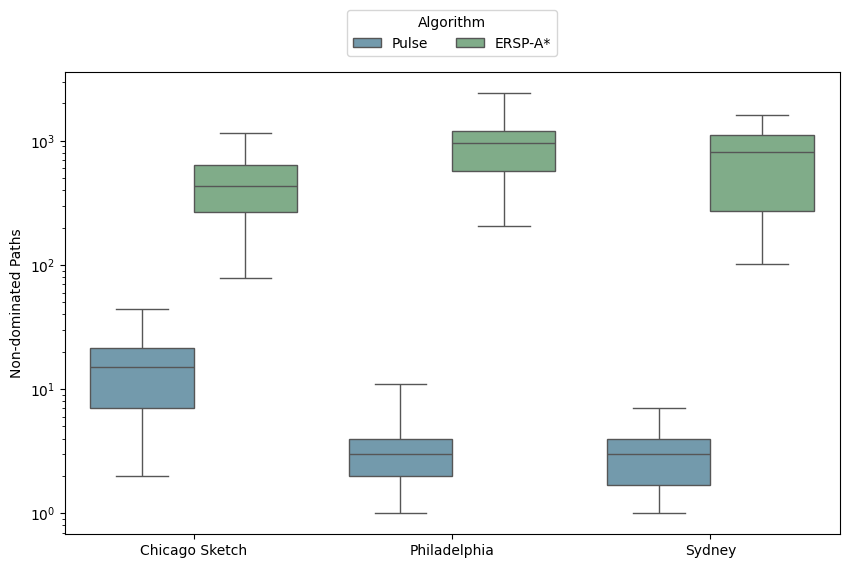

Mean Non-Dominated Paths for Each Algorithm by Network:
          Network Algorithm NonDominatedPaths
0  Chicago Sketch   ERSP-A*          4.68e+02
1  Chicago Sketch     Pulse          1.46e+01
2    Philadelphia   ERSP-A*          8.87e+02
3    Philadelphia     Pulse          3.03e+00
4          Sydney   ERSP-A*          7.60e+02
5          Sydney     Pulse          2.82e+00


In [10]:
melted_data = pd.melt(nondominated_sdrspp, var_name="Network", value_name="NonDominatedPaths")

melted_data["Algorithm"] = melted_data["Network"].apply(lambda x: "ERSP-A*" if "ERSPA" in x else "Pulse")
melted_data["Network"] = melted_data["Network"].replace({
    "CS_n": "Chicago Sketch",
    "CS_n_ERSPA": "Chicago Sketch",
    "PH_n": "Philadelphia",
    "PH_n_ERSPA": "Philadelphia",
    "SY_n": "Sydney",
    "SY_n_ERSPA": "Sydney"
})

fig, ax = plt.subplots(figsize=(10, 6))


boxplot = sns.boxplot(
    data=melted_data,
    x="Network",
    y="NonDominatedPaths",
    hue="Algorithm",
    palette=[pastel_blue, pastel_green],
    showfliers=False,
    ax=ax,
    log_scale=True
)


handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles)) 
ax.legend(unique_labels.values(), unique_labels.keys(), title="Algorithm", loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.15))

ax.set_xlabel('')
boxplot.set_ylabel("Non-dominated Paths", fontsize=10)
plt.show()

mean_values = melted_data.groupby(["Network", "Algorithm"])["NonDominatedPaths"].mean().reset_index()
mean_values["NonDominatedPaths"] = mean_values["NonDominatedPaths"].apply(lambda x: "{:.2e}".format(x))
print("Mean Non-Dominated Paths for Each Algorithm by Network:")
print(mean_values)